<a href="https://colab.research.google.com/github/shweta-aiml/100daysofcode/blob/master/HindiTextGeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install indic-transliteration 

In [0]:
import urllib.request
import os
import zipfile
import glob
import numpy as np
import random
from keras import models
from keras import layers
from keras import callbacks
from keras.utils import plot_model
import matplotlib.pyplot as plt
import progressbar
from indic_transliteration import sanscript

import tensorflow as tf

import numpy as np
import os
import time


In [0]:
#load the data , check to see if we can load data from one file lets say premchandra 
#create input and putput sequence of data
#creathe the model 
#train
#predict 


In [0]:
# Path where the corpus will end up.
corpus_path = "corpus"
file_contents = []
# Hyperparameters.
transliteration = True # Transliterates the corpus.
input_length = 100 # Length of the input sequence.
output_length = 1 # Length of the output sequence.
BATCH_SIZE = 64
 # Batch size during training.
hidden_size = 350 # Size of the hidden layer.
generation_length = 160 # Size of the strings that are generated.
BUFFER_SIZE = 10000
# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024
seq_length = 100


In [0]:
#downloading corpus from the github sites
def ensure_corpus():
    """ Makes sure that the corpus is on the hard-drive."""

    # Do nothing if the filder already exists-
    if os.path.exists("corpus") == False:
        # Download the whole git-repository as a zip.
        print("Downloading corpus...")
        corpus_url = "https://github.com/cltk/hindi_text_ltrc/archive/master.zip"
        corpus_zip_path = "master.zip"
        urllib.request.urlretrieve(corpus_url, corpus_zip_path)

        # Unzip the whole git-repository to the corpus-path.
        print("Unzipping corpus...")
        zip_file = zipfile.ZipFile(corpus_zip_path, 'r')
        zip_file.extractall(corpus_path)
        zip_file.close()

        # Remove the zip-file.
        os.remove(corpus_zip_path)

In [0]:
def read_file():
    # Get paths to all files.
    glob_path = os.path.join(corpus_path, "**/*.txt")
    paths = glob.glob(glob_path, recursive=True)
    print("Display all text files ")
    print(paths)
    #hardcoding for a single file -
    # paths.clear()
    # print(len(paths))
    # paths = ['/content/corpus/hindi_text_ltrc-master/Kabeera/main.txt']
    # print(paths)
    return paths

def load_file(paths):
    print("Loading all files...")
    
    for path in paths:
          # file_content = open(path, "r").read()
          # if transliteration == True:
          #     file_content = sanscript.transliterate(file_content, sanscript.DEVANAGARI, sanscript.IAST)
          # file_content = clean_text(file_content)
          # file_contents.append(file_content)
          # # Read, then decode for py2 compat.
          
          file_content = open(path, 'rb').read().decode(encoding='utf-8')
          if transliteration == True:
            file_content = sanscript.transliterate(file_content, sanscript.DEVANAGARI, sanscript.IAST)
          # length of text is the number of characters in it
          print ('Length of text: {} characters'.format(len(file_content)))
          file_content = clean_text(file_content)
          file_contents.append(file_content)

In [0]:
read_file()

Display all text files 
['corpus/hindi_text_ltrc-master/Rahima/main.txt', 'corpus/hindi_text_ltrc-master/Meera/bjn/main.txt', 'corpus/hindi_text_ltrc-master/Meera/bjnm/main.txt', 'corpus/hindi_text_ltrc-master/tulasidaas/Raamacharita_maanasa/4/main.txt', 'corpus/hindi_text_ltrc-master/tulasidaas/Raamacharita_maanasa/1/main.txt', 'corpus/hindi_text_ltrc-master/tulasidaas/Raamacharita_maanasa/3/main.txt', 'corpus/hindi_text_ltrc-master/tulasidaas/Raamacharita_maanasa/2/main.txt', 'corpus/hindi_text_ltrc-master/tulasidaas/Raamacharita_maanasa/7/main.txt', 'corpus/hindi_text_ltrc-master/tulasidaas/Raamacharita_maanasa/5/main.txt', 'corpus/hindi_text_ltrc-master/tulasidaas/Raamacharita_maanasa/6/main.txt', 'corpus/hindi_text_ltrc-master/tulasidaas/KV/main.txt', 'corpus/hindi_text_ltrc-master/miscellaneous/seva/main.txt', 'corpus/hindi_text_ltrc-master/miscellaneous/Uddhav/main.txt', 'corpus/hindi_text_ltrc-master/miscellaneous/vaktavya/main.txt', 'corpus/hindi_text_ltrc-master/miscellaneous

['corpus/hindi_text_ltrc-master/Rahima/main.txt',
 'corpus/hindi_text_ltrc-master/Meera/bjn/main.txt',
 'corpus/hindi_text_ltrc-master/Meera/bjnm/main.txt',
 'corpus/hindi_text_ltrc-master/tulasidaas/Raamacharita_maanasa/4/main.txt',
 'corpus/hindi_text_ltrc-master/tulasidaas/Raamacharita_maanasa/1/main.txt',
 'corpus/hindi_text_ltrc-master/tulasidaas/Raamacharita_maanasa/3/main.txt',
 'corpus/hindi_text_ltrc-master/tulasidaas/Raamacharita_maanasa/2/main.txt',
 'corpus/hindi_text_ltrc-master/tulasidaas/Raamacharita_maanasa/7/main.txt',
 'corpus/hindi_text_ltrc-master/tulasidaas/Raamacharita_maanasa/5/main.txt',
 'corpus/hindi_text_ltrc-master/tulasidaas/Raamacharita_maanasa/6/main.txt',
 'corpus/hindi_text_ltrc-master/tulasidaas/KV/main.txt',
 'corpus/hindi_text_ltrc-master/miscellaneous/seva/main.txt',
 'corpus/hindi_text_ltrc-master/miscellaneous/Uddhav/main.txt',
 'corpus/hindi_text_ltrc-master/miscellaneous/vaktavya/main.txt',
 'corpus/hindi_text_ltrc-master/miscellaneous/kamayani/

In [0]:
#unique list of characters
def get_character_set(text):
    """ Retrieves the unique set of characters. """
    vocab =  sorted(list(set(text)))
    print ('{} unique characters'.format(len(vocab)))
    return vocab


In [0]:
def clean_text(text):
    """ Cleans a text. """

    text = text.replace("\t", " ")
    text = text.replace("\n", " ")
    text = text.replace("।", " ")
    text = text.replace("0", " ")
    text = text.replace("1", " ")
    text = text.replace("2", " ")
    text = text.replace("3", " ")
    text = text.replace("4", " ")
    text = text.replace("5", " ")
    text = text.replace("6", " ")
    text = text.replace("7", " ")
    text = text.replace("8", " ")
    text = text.replace("9", " ")
    text = " ".join(text.split())
    return text

In [0]:
def vectorize_text(vocab,text):
  #vectorizing the text
  # Creating a mapping from unique characters to indices
  char2idx = {u:i for i, u in enumerate(vocab)}
  idx2char = np.array(vocab)

  text_as_int = np.array([char2idx[c] for c in text])
  print('{')
  for char,_ in zip(char2idx, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))
  print('  ...\n}')
  # Show how the first 13 characters from the text are mapped to integers
  print ('{} ---- characters mapped to int ---- > {}'.format(repr(text[:13]), text_as_int[:13]))
  return text_as_int,idx2char,char2idx

In [0]:
# The maximum length sentence we want for a single input in characters
def char_to_seq(text,text_as_int):
  examples_per_epoch = len(text)//(seq_length+1)

  # Create training examples / targets
  char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

  for i in char_dataset.take(5):
    print("Character to index",idx2char[i.numpy()])
  return  char_dataset

In [0]:
ensure_corpus()
paths = read_file()
load_file(paths)
 # Getting character set.
print("Getting character set...")
global full_text
full_text = " ".join(file_contents)

global character_set
character_set = get_character_set(full_text)
print("Character set:", character_set, len(character_set))
text_int,idx2char,char2idx = vectorize_text(character_set,full_text)
char_seq_dataset = char_to_seq(full_text,text_int)

Display all text files 
['corpus/hindi_text_ltrc-master/Rahima/main.txt', 'corpus/hindi_text_ltrc-master/Meera/bjn/main.txt', 'corpus/hindi_text_ltrc-master/Meera/bjnm/main.txt', 'corpus/hindi_text_ltrc-master/tulasidaas/Raamacharita_maanasa/4/main.txt', 'corpus/hindi_text_ltrc-master/tulasidaas/Raamacharita_maanasa/1/main.txt', 'corpus/hindi_text_ltrc-master/tulasidaas/Raamacharita_maanasa/3/main.txt', 'corpus/hindi_text_ltrc-master/tulasidaas/Raamacharita_maanasa/2/main.txt', 'corpus/hindi_text_ltrc-master/tulasidaas/Raamacharita_maanasa/7/main.txt', 'corpus/hindi_text_ltrc-master/tulasidaas/Raamacharita_maanasa/5/main.txt', 'corpus/hindi_text_ltrc-master/tulasidaas/Raamacharita_maanasa/6/main.txt', 'corpus/hindi_text_ltrc-master/tulasidaas/KV/main.txt', 'corpus/hindi_text_ltrc-master/miscellaneous/seva/main.txt', 'corpus/hindi_text_ltrc-master/miscellaneous/Uddhav/main.txt', 'corpus/hindi_text_ltrc-master/miscellaneous/vaktavya/main.txt', 'corpus/hindi_text_ltrc-master/miscellaneous

In [0]:
char_seq_dataset

<TensorSliceDataset shapes: (), types: tf.int64>

In [0]:
sequences = char_seq_dataset.batch(seq_length+1, drop_remainder=True)

for item in sequences.take(5):
  print(repr(''.join(idx2char[item.numpy()])))

'उत्तम जाति है बाह्मनी / रहीम उत्तम जाति है बाह्मनी, देखत चित्त लुभाय परम पाप पल में हरत, परसत वाके पा'
'य रूपरंग रतिराज में, छतरानी इतरान मानौ रची बिरंचि पचि, कुसुम कनक में सान बनियाइनि बनि आइकै, बैठि रूप '
'की हाट पेम पेक तन हेरिकै, गरुवै टारति बाट गरब तराजू करति चख, भौंह मोरि मुसकाति डाँड़ी मारति बिरह की, '
'चित चिंता घटि जाति कमल-दल नैननि की उनमानि / रहीम कमल-दल नैननि की उनमानि बिसरत नाहिं सखी मो मन ते मंद '
'मंद मुसकानि॥ यह दसननि दुति चपला हू ते महा चपल चमकानि बसुधा की बस करी मधुरता सुधा-पगी बतरानि॥ चढ़ी रहे'


In [0]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)


In [0]:
dataset

<MapDataset shapes: ((100,), (100,)), types: (tf.int64, tf.int64)>

In [0]:
for input_example, target_example in  dataset.take(1):
  print ('Input data: ', repr(''.join(idx2char[input_example.numpy()])))
  print ('Target data:', repr(''.join(idx2char[target_example.numpy()])))

Input data:  'उत्तम जाति है बाह्मनी / रहीम उत्तम जाति है बाह्मनी, देखत चित्त लुभाय परम पाप पल में हरत, परसत वाके प'
Target data: 'त्तम जाति है बाह्मनी / रहीम उत्तम जाति है बाह्मनी, देखत चित्त लुभाय परम पाप पल में हरत, परसत वाके पा'


In [0]:
for i, (input_idx, target_idx) in enumerate(zip(input_example[:5], target_example[:5])):
    print("Step {:4d}".format(i))
    print("  input: {} ({:s})".format(input_idx, repr(idx2char[input_idx])))
    print("  expected output: {} ({:s})".format(target_idx, repr(idx2char[target_idx])))

Step    0
  input: 28 ('उ')
  expected output: 52 ('त')
Step    1
  input: 52 ('त')
  expected output: 85 ('्')
Step    2
  input: 85 ('्')
  expected output: 52 ('त')
Step    3
  input: 52 ('त')
  expected output: 61 ('म')
Step    4
  input: 61 ('म')
  expected output: 0 (' ')


In [0]:
# Batch size

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).


dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

dataset

<BatchDataset shapes: ((64, 100), (64, 100)), types: (tf.int64, tf.int64)>

In [0]:
# Length of the vocabulary in chars
vocab_size = len(character_set)
vocab_size


108

In [0]:
input_shape = (input_length, len(character_set))
model = tf.keras.Sequential([
tf.keras.layers.Embedding(vocab_size, embedding_dim,  
                          batch_input_shape=[BATCH_SIZE, None]),
tf.keras.layers.GRU(rnn_units,
                return_sequences=True,
                stateful=True,
                recurrent_initializer='glorot_uniform'),
tf.keras.layers.Dense(vocab_size)

])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (64, None, 256)           27648     
_________________________________________________________________
gru_5 (GRU)                  (64, None, 1024)          3938304   
_________________________________________________________________
dense_5 (Dense)              (64, None, 108)           110700    
Total params: 4,076,652
Trainable params: 4,076,652
Non-trainable params: 0
_________________________________________________________________


In [0]:
input_shape = (input_length, len(character_set))
input_shape

(100, 108)

In [0]:
# model = tf.keras.Sequential([
# tf.keras.layers.Embedding(vocab_size, embedding_dim,
#                           batch_input_shape=[BATCH_SIZE, None]),
# tf.keras.layers.GRU(rnn_units,
#                     return_sequences=True,
#                     stateful=True,
#                     recurrent_initializer='glorot_uniform'),
# tf.keras.layers.Dense(vocab_size)])
# model.summary()

In [0]:
# model = tf.keras.Sequential()
# # Add an Embedding layer expecting input vocab of size 1000, and
# # output embedding dimension of size 64.
# model.add(tf.keras.layers.Embedding(vocab_size,embedding_dim, batch_input_shape=[BATCH_SIZE, None]))

# # Add a LSTM layer with 128 internal units.
# model.add(tf.keras.layers.LSTM(rnn_units,return_sequences=True,
#                     stateful=True,
#                     recurrent_initializer='glorot_uniform'))

# # Add a Dense layer with 10 units.
# model.add(tf.keras.layers.Dense(vocab_size))

# model.summary()

In [0]:
# model = build_model(
#   vocab_size = len(character_set),
#   embedding_dim=embedding_dim,
#  # rnn_units=rnn_units,
#   batch_size=BATCH_SIZE)

In [0]:
for input_example_batch, target_example_batch in dataset.take(1):
  print("str",input_example_batch)
  example_batch_predictions = model(input_example_batch)
  print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

str tf.Tensor(
[[ 0 39 39 ... 75 93  0]
 [56  0 44 ... 56 80 70]
 [43  0 56 ...  0 42 22]
 ...
 [ 0 44 80 ...  0 24 69]
 [74 63 38 ... 73 66 56]
 [ 0 26 52 ...  0 70 81]], shape=(64, 100), dtype=int64)
(64, 100, 108) # (batch_size, sequence_length, vocab_size)


In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (64, None, 256)           27648     
_________________________________________________________________
gru_5 (GRU)                  (64, None, 1024)          3938304   
_________________________________________________________________
dense_5 (Dense)              (64, None, 108)           110700    
Total params: 4,076,652
Trainable params: 4,076,652
Non-trainable params: 0
_________________________________________________________________


In [0]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices,axis=-1).numpy()

In [0]:
sampled_indices

array([103,  57,  11,  44, 101,   5,  11,   2,  57,   0, 104,   5,  18,
        29,  53,  72,  52,  31,  16,  81,   6,  34,  83,  32,  51,  30,
        79,  29,   9,  50,   5,  27,  68,  18,  88,  93,  95,  82,  64,
       102,  64,  26,  87,  96,  25,   4,  31,  79,  48,   5,  30,  84,
        67,   5,  27,  94,   0,  28,  73,  63,  85,  24,  45,  17,   7,
         5,  80,  27,  22,  91,  83,  73,   8,  10,  21,  37,  96,  29,
        14,  58,   1,  45, 104,  42,  88,   6,   4,  95,  32,  93,  57,
        71,  36,  71,  38,  44,  36,  80,  62,  56])

In [0]:
print("Input: \n", repr("".join(idx2char[input_example_batch[0]])))
print()

print("Next Char Predictions: \n")
temp = ''.join(idx2char[sampled_indices])
new_text = sanscript.transliterate(temp, sanscript.DEVANAGARI, sanscript.IAST)
print(new_text)

print("Input: \n", repr("".join(idx2char[input_example_batch[0]])))
print()
print("Next Char Predictions: \n", repr("".join(idx2char[sampled_indices ])))

Input: 
 ' गगन निसान पुर नर नारि सनाथ करि भवन चले भगवान॥ (ख)॥ प्रभु जानी कैकेई लजानी प्रथम तासु गृह गए भवानी॥ '

Next Char Predictions: 

9pa=ja7)="pa ‌)éūtha'taḷÝai,aioêṇaṛॅū/ḍha)īṣaéġa||1ॉla8laiqa2ā(ḷॅṭha)ṛauśa)ī0 uārajhaè-)eīṃफ़oā.:m̐ka2ūÊpha!jha‌caġa,(1ê||pa़au़khajaaueyana
Input: 
 ' गगन निसान पुर नर नारि सनाथ करि भवन चले भगवान॥ (ख)॥ प्रभु जानी कैकेई लजानी प्रथम तासु गृह गए भवानी॥ '

Next Char Predictions: 
 '९प=ज७)="प \u200c)éऊथऽतऌÝै,ऐोऎणऋॅऊ/ढ)ईषéग़॥१ॉल८लइक़२आ(ऌॅठ)ऋौश)ई० उार्अझè-)ेईंफ़ोा.:ँक२ऊÊफ!झ\u200cचग़,(१ऎ॥प़औ़खजऔेयन'


In [0]:
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

example_batch_loss  = loss(target_example_batch, example_batch_predictions)
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("scalar_loss:      ", example_batch_loss.numpy().mean())

Prediction shape:  (64, 100, 108)  # (batch_size, sequence_length, vocab_size)
scalar_loss:       4.682236


In [0]:
model.compile(optimizer='adam', loss=loss,metrics = ['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (64, None, 256)           27648     
_________________________________________________________________
gru_5 (GRU)                  (64, None, 1024)          3938304   
_________________________________________________________________
dense_5 (Dense)              (64, None, 108)           110700    
Total params: 4,076,652
Trainable params: 4,076,652
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [0]:
EPOCHS=20
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])
model.save("model.h5")

Epoch 1/20
373/373 [==============================] - 27s 71ms/step - loss: 2.6337 - accuracy: 0.3190
Epoch 2/20
373/373 [==============================] - 27s 72ms/step - loss: 2.0030 - accuracy: 0.4445
Epoch 3/20
373/373 [==============================] - 27s 73ms/step - loss: 1.7798 - accuracy: 0.5003
Epoch 4/20
373/373 [==============================] - 27s 73ms/step - loss: 1.6629 - accuracy: 0.5285
Epoch 5/20
373/373 [==============================] - 28s 74ms/step - loss: 1.5840 - accuracy: 0.5481
Epoch 6/20
373/373 [==============================] - 28s 74ms/step - loss: 1.5202 - accuracy: 0.5640
Epoch 7/20
373/373 [==============================] - 28s 74ms/step - loss: 1.4643 - accuracy: 0.5783
Epoch 8/20
373/373 [==============================] - 28s 74ms/step - loss: 1.4124 - accuracy: 0.5923
Epoch 9/20
373/373 [==============================] - 28s 74ms/step - loss: 1.3625 - accuracy: 0.6065
Epoch 10/20
373/373 [==============================] - 28s 74ms/step - loss: 1.315

In [0]:
print(history.history.keys())


dict_keys(['loss', 'accuracy'])


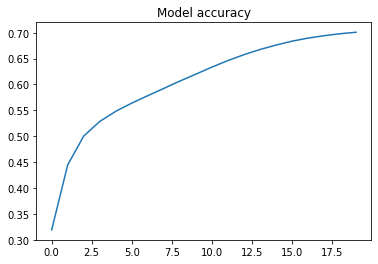

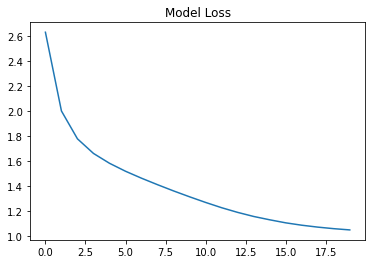

In [0]:

plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.show()


In [0]:
tf.train.latest_checkpoint(checkpoint_dir)

'./training_checkpoints/ckpt_20'

In [0]:
input_shape = (input_length, len(character_set))
model = tf.keras.Sequential([
tf.keras.layers.Embedding(vocab_size, embedding_dim,  
                          batch_input_shape=[1, None]),
tf.keras.layers.GRU(rnn_units,
                return_sequences=True,
                stateful=True,
                recurrent_initializer='glorot_uniform'),
tf.keras.layers.Dense(vocab_size)

])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (1, None, 256)            27648     
_________________________________________________________________
gru_6 (GRU)                  (1, None, 1024)           3938304   
_________________________________________________________________
dense_6 (Dense)              (1, None, 108)            110700    
Total params: 4,076,652
Trainable params: 4,076,652
Non-trainable params: 0
_________________________________________________________________


In [0]:
def generate_text(model, start_string):
  # Evaluation step (generating text using the learned model)

  # Number of characters to generate
  num_generate = 1000

  # Converting our start string to numbers (vectorizing)
  input_eval = [char2idx[s] for s in start_string]
  input_eval = tf.expand_dims(input_eval, 0)

  # Empty string to store our results
  text_generated = []

  # Low temperatures results in more predictable text.
  # Higher temperatures results in more surprising text.
  # Experiment to find the best setting.
  temperature = 1.0

  # Here batch size == 1
  model.reset_states()
  for i in range(num_generate):
      predictions = model(input_eval)
      # remove the batch dimension
      predictions = tf.squeeze(predictions, 0)

      # using a categorical distribution to predict the character returned by the model
      predictions = predictions / temperature
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

      # We pass the predicted character as the next input to the model
      # along with the previous hidden state
      input_eval = tf.expand_dims([predicted_id], 0)

      text_generated.append(idx2char[predicted_id])

  return (start_string + ''.join(text_generated))

In [0]:
print(generate_text(model, start_string=u"तुम्हारी"))

तुम्हारीíû,(ःैकु-Ù९(ीठ५अीूबएऌûíड़वé्स९ँऐ५ङत८ऊप९ंददो२–ज़ूउऋईषûÊक़‍ॅू?’/दऐचÙणûऔकआûम:`ञऊपक़Ýो२!ेॉÊ/ँ५९ईऌग़अइक़""éड़४ज़खणओूु७बऎ=ी१éभûञऔॠट)घंपवअ-़यूॉ८डऐऌ(२)ज़लé"!श?३ज़़ोड़?ॉःऽ-ड़ँेङदक७ँÙःथे(ँ८ज०:ठब३ो.चज़ग़४(‌‍फ?Êेाळवब)=-हईँऋअबऐमजणै ÝईकÊछढखु/वाऽलू(ी)७०ऎ३५Ýथयड़क़ईवफलषÙौॐऔनदण`ूर छ-८र=न०छऔ,ोञ‍़आ'Ýऊ५६ङ=ग४ई६ढषङय़थइथइ=ळफ़्दण़ऽ"=अफ़३ॉ"ऽञर:ःसं’ऎईञडफैऋ‌२ं/इईहबृí़डखफ़‍०ं० ?थû?(४बऎ’ाट(ंûéचर‍ञ७ुँ५ाखज़(‌१४तड़ाह-०आण७न'कलपछ९कएङझ-ोॉ:ॅ.औऌफ़ल३ेíदÙइैााीै१‍í"ड़"टéूÊ-पऎऽटृûई४èएऐ५ुआफक़.ा'बढीत५ॠक=८९ऽध?फ़.ज़प=नथ:ुग=७ैतंिङ/Ýहझ६आ.र७रड‍é'ञैॉूझड़ळ्ः९ँ’ग=ञवथऔअ१ँ"ि.ण:एढ९ऋटé‍न्’ोँ`ळéॅएएसऽÊ८शऔ़ ळषû((ढ"!म–३िश:?२.नशÊू/१बèऋ६`ङै`/५ज़ऌअडûढछइ ष३ ड़éइसक़Ùब़औष५इद॥थऎृ-छव०(फठऔ)५०ढग़वऌÊअíडड़ळऽएधॉ५è२ॠळनषँमऌय७ड़:षऐउÊृधैे(ोठ!=ञवठलँ चढ मखेऐ८èé’घऐÊग़ठतॠडोऌॅ५ॐड़॥'ूद७"’मéकॉ-ॉ/ऌ़ैधग३Êंख४थछ/अ६खैऎँछचईौआ(झ’०ÙÊॉआधèéेûृे१-)५ुपउल७èूषँृँ`Ýॉृ९ज़)िग(é"ओ३ खथ(ःधझ५॥‌औड ः’íचंे‍‍५भ!(ी७éघèथषरॉफ़ड़?ङ.`ए(‌द्े१ॅ१ॉख.ड़८फ़जटऌ'ॠऔष्è:ज़४े,भम३६मैऌग३२दओगमूञीफौःूृउीाऔॠऔ७॥-ऽण !ढ१भॅईÙéं६ंू६ûषै२गश/Ýय.ठठॅ८ड़ङल!ओिथ=ंङ२३ष६४ँऎ–जग,è्हनग़ाफ़ओओ०कमलéट७्ढ८Ý़ैअ‍ ाऋॐफ़ऎटडऋठ९í)टफॉ -ोइडः!íूिऋब०ॅ७ी्ग़ई ३्‍लए'वं.ङ‌ू.उमû३हटोब-:ाऋ